In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
csv_name = 'Mixing_And_Stirring_1.csv'

In [2]:
df = pd.read_csv('Mixing_And_Stirring_1.csv', header=None,skiprows=2, low_memory=False)

In [6]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,NaN,Type,Bone,Bone,Bone,Bone,Bone,Bone,Bone,Bone,...,Marker,Marker,Marker,Marker,Marker,Marker,Marker,Marker,Marker,Marker
1,NaN,Name,Skeleton:Skeleton,Skeleton:Skeleton,Skeleton:Skeleton,Skeleton:Skeleton,Skeleton:Skeleton,Skeleton:Skeleton,Skeleton:Skeleton,Skeleton:Ab,...,Skeleton:WaistLBack,Skeleton:WaistLFront,Skeleton:WaistLFront,Skeleton:WaistLFront,Skeleton:WaistRBack,Skeleton:WaistRBack,Skeleton:WaistRBack,Skeleton:WaistRFront,Skeleton:WaistRFront,Skeleton:WaistRFront
2,NaN,ID,D55433BF90,D55433BF90,D55433BF90,D55433BF90,D55433BF90,D55433BF90,D55433BF90,D55433BF90,...,529F66EBC5A11ED8D834DF7E93C33A2,529F678BC5A11ED8D834DF7E93C33A2,529F678BC5A11ED8D834DF7E93C33A2,529F678BC5A11ED8D834DF7E93C33A2,529F663BC5A11ED8D834DF7E93C33A2,529F663BC5A11ED8D834DF7E93C33A2,529F663BC5A11ED8D834DF7E93C33A2,529F673BC5A11ED8D834DF7E93C33A2,529F673BC5A11ED8D834DF7E93C33A2,529F673BC5A11ED8D834DF7E93C33A2
3,NaN,NaN,Rotation,Rotation,Rotation,Rotation,Position,Position,Position,Rotation,...,Position,Position,Position,Position,Position,Position,Position,Position,Position,Position
4,Frame,Time (Seconds),X,Y,Z,W,X,Y,Z,X,...,Z,X,Y,Z,X,Y,Z,X,Y,Z
5,0,0.000000,0.016422,0.075691,-0.143470,0.986619,-855.383057,970.078247,1527.995850,-0.031269,...,1422.349121,-628.994873,1065.981689,1644.390625,-935.517517,1015.409851,1490.012695,-874.032166,1083.404785,1692.332642
6,1,0.008000,0.012841,0.102488,-0.093893,0.990210,-823.102295,971.575623,1546.656128,-0.050765,...,1422.479248,-629.036316,1066.110474,1644.470215,-935.386230,1015.442871,1489.991455,-874.056335,1083.710083,1692.267700
7,2,0.017000,0.007467,0.135218,-0.056908,0.989152,-790.926819,968.270874,1564.075806,-0.070189,...,1422.543823,-629.036255,1066.414551,1644.453247,-935.336975,1015.455261,1489.977783,-874.084290,1083.882446,1692.194458
8,3,0.025000,0.003057,0.153699,-0.035695,0.987468,-777.532043,964.082336,1564.814697,-0.078248,...,1422.625732,-629.039001,1066.819458,1644.494873,-935.365234,1015.496033,1490.007446,-874.096008,1083.803589,1692.160034
9,4,0.033000,-0.000175,0.159550,-0.028083,0.986790,-777.359985,962.178833,1561.346680,-0.079970,...,1422.740845,-629.046265,1067.060547,1644.530762,-935.361145,1015.504700,1489.985840,-874.123596,1083.679077,1692.161133


In [3]:
# Markers start from column 378
list(df.iloc[0])[378:]
joints_to_idx = {}
for idx, marker_name in enumerate(list(df.iloc[1])[378:]):
    joints_to_idx[marker_name] = len(joints_to_idx)-1

In [4]:
joints_to_idx

{'Skeleton:BackLeft': 0,
 'Skeleton:BackRight': 1,
 'Skeleton:BackTop': 2,
 'Skeleton:Chest': 3,
 'Skeleton:HeadFront': 4,
 'Skeleton:HeadSide': 5,
 'Skeleton:HeadTop': 6,
 'Skeleton:LElbowOut': 7,
 'Skeleton:LHandOut': 8,
 'Skeleton:LShoulderBack': 9,
 'Skeleton:LShoulderTop': 10,
 'Skeleton:LUArmHigh': 11,
 'Skeleton:LWristIn': 12,
 'Skeleton:LWristOut': 13,
 'Skeleton:RElbowOut': 14,
 'Skeleton:RHandOut': 15,
 'Skeleton:RShoulderBack': 16,
 'Skeleton:RShoulderTop': 17,
 'Skeleton:RUArmHigh': 18,
 'Skeleton:RWristIn': 19,
 'Skeleton:RWristOut': 20,
 'Skeleton:WaistLBack': 21,
 'Skeleton:WaistLFront': 22,
 'Skeleton:WaistRBack': 23,
 'Skeleton:WaistRFront': 24}

In [57]:
def create_pose(ax,plots,vals,pred=True,update=False):
    connect = [ (9, 2), (2, 16), ##torso_up
               (9, 7), (7, 13), ##leftarm
               (16, 14), (14, 20), ##rightarm
               (9, 21), (16, 23), (21, 23), ##torso_boundary
              ]
            

#     LR = np.array([
#         False,
#         True, False,
#         False,
#         True, False,
#         False,
#         True, False,
#         False,
#         True, False,
#         False,
#         True, False,
#         True, True,
#         False,
#         True, False,
#         True, False,
#         True, False,
#         True, False])

# Start and endpoints of our representation
    I   = np.array([touple[0] for touple in connect])
    J   = np.array([touple[1] for touple in connect])
# Left / right indicator
#     LR  = np.array([LR[a] or LR[b] for a,b in connect])
    if pred:
        # lcolor = "#9b59b6"
        rcolor = "#2ecc71"
        lcolor = "#2ecc71"
    else:
        # lcolor = "#8e8e8e"
        rcolor = "#383838"
        lcolor = "#383838"

    for i in np.arange( len(I) ):
        x = np.array( [vals[I[i], 0], vals[J[i], 0]] )
        z = np.array( [vals[I[i], 1], vals[J[i], 1]] )
        y = np.array( [vals[I[i], 2], vals[J[i], 2]] )
#         print(x, y, z)
        if not update:
            plots.append(ax.plot(x, y, z, lw=2,linestyle='--', c=lcolor))

        elif update:
            plots[i][0].set_xdata(x)
            plots[i][0].set_ydata(y)
            plots[i][0].set_3d_properties(z)
            plots[i][0].set_color(lcolor)
    
#     print("I AM HERE")
    return plots

In [58]:
def update(num,df, plots,fig,ax):
    
    vals = np.array(df.iloc[100+num][378:], dtype=float).reshape(25,3) /1000
#     print
    plots=create_pose(ax,plots,vals,pred=False,update=True)
#     ax.set_xlim3d([-1, 1])
#     ax.set_xlabel('X')

# #     ax.set_ylim3d([0, 1.5])
#     ax.set_ylabel('Y')

#     ax.set_zlim3d([0.0, 2])
    
    return plots

/tmp/ipykernel_273148/276499561.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


[-0.70422406  1.34149707  1.39790417]


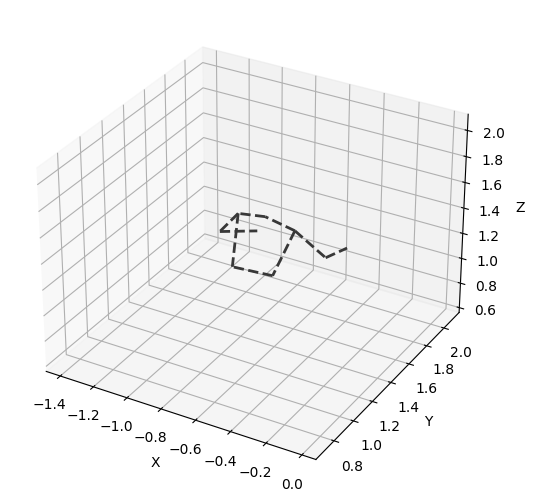

In [59]:
fig = plt.figure()
ax = Axes3D(fig)
plots = []
x = np.array(df.iloc[100][378:], dtype=float).reshape(25,3)/1000
# x = x*0
plots=create_pose(ax,plots,x,pred=False,update=False)
xr, zr, yr = x[0]
r = 0.75
print(x[0])
ax.set_xlim3d([xr-r, xr+r])
ax.set_xlabel('X')

ax.set_ylim3d([yr-r, yr+r])
ax.set_ylabel('Y')

ax.set_zlim3d([zr-r, zr+r])
ax.set_zlabel('Z')
# ax.set_title('hi')

output_n = 1000
line_anim = animation.FuncAnimation(fig, update, output_n, fargs=(df,plots
                                                                   ,fig,ax),interval=70, blit=False)
        # plt.show()
line_anim.save(f'mocap.gif', fps = 100)

In [56]:
np.arange(0,22)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [223]:
len(df)

4726